In [1]:
import requests
import zipfile

import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [2]:
# data from UCI Machine Learning Repository:
#   Dua, D. and Graff, C. (2019). 
#   UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. 
#   Irvine, CA: University of California, School of Information and Computer Science.

# code to download the data
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00501/PRSA2017_Data_20130301-20170228.zip'
file_name = url.split('/')[-1]
r = requests.get(url)
with open(file_name, 'wb') as fout:
    fout.write(r.content)

with zipfile.ZipFile(file_name, 'r') as zip_file:
    zip_file.extractall('./')

In [3]:
df = pd.read_csv('./PRSA_Data_20130301-20170228//PRSA_Data_Aotizhongxin_20130301-20170228.csv', sep=',')

In [4]:
df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34139 non-null  float64
 6   PM10     34346 non-null  float64
 7   SO2      34129 non-null  float64
 8   NO2      34041 non-null  float64
 9   CO       33288 non-null  float64
 10  O3       33345 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [6]:
df = df.fillna(method='ffill')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    35064 non-null  float64
 6   PM10     35064 non-null  float64
 7   SO2      35064 non-null  float64
 8   NO2      35064 non-null  float64
 9   CO       35064 non-null  float64
 10  O3       35064 non-null  float64
 11  TEMP     35064 non-null  float64
 12  PRES     35064 non-null  float64
 13  DEWP     35064 non-null  float64
 14  RAIN     35064 non-null  float64
 15  wd       35064 non-null  object 
 16  WSPM     35064 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [8]:
data_cols = df.columns[11:-4].to_list() + [df.columns[16]]

In [9]:
data_cols

['TEMP', 'PRES', 'DEWP', 'WSPM']

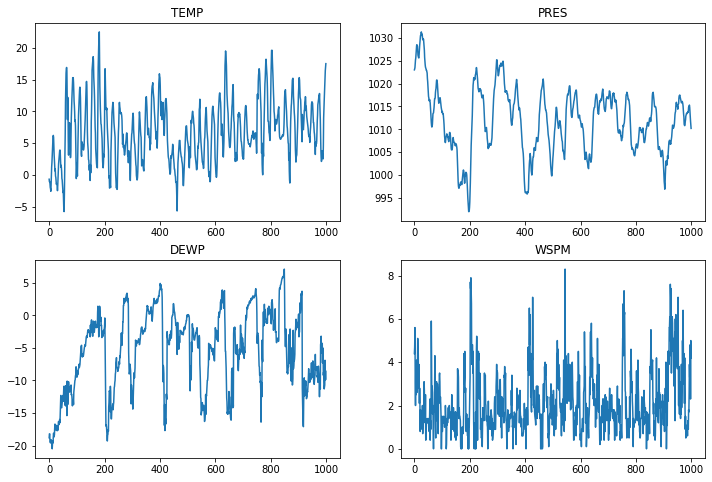

In [10]:
fig, ax = plt.subplots(2,2, figsize=(12,8))
for idx, series in enumerate(data_cols):
    ax_ = ax[idx//2,idx%2]
    ax_.set_title(series)
    df[series].iloc[:1000].plot(ax=ax_)
#fig.savefig('./weather_vars.png', dpi=300)

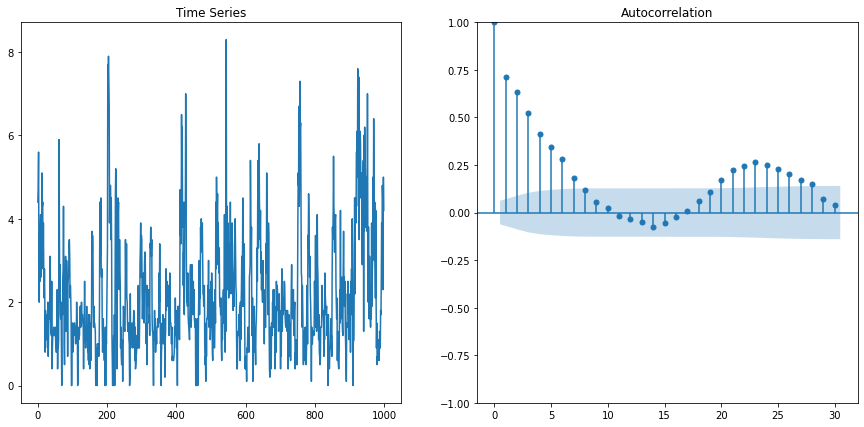

In [11]:
fig, ax = plt.subplots(1,2, figsize=(15,7))
ax[0].plot(df.WSPM.iloc[:1000])
ax[0].set_title("Time Series")
sm.graphics.tsa.plot_acf(df.WSPM.iloc[:1000], ax=ax[1])
plt.show()
#fig.savefig('./wspm.png', dpi=300)

In [12]:
from scipy.signal import correlate

# code adapted from chapter 10
def plot_ccf(data_a, data_b, lag_lookback, percentile, ax, title=None):

    n = len(data_a)
    ccf = correlate(data_a - np.mean(data_a), data_b - np.mean(data_b), method='direct') / (np.std(data_a) * np.std(data_b) * n)

    _min = (len(ccf)-1)//2 - lag_lookback
    _max = (len(ccf)-1)//2 + (lag_lookback-1)

    zscore_vals={90:1.645,
                 95:1.96,
                 99:2.576}

    markers, stems, baseline = ax.stem(np.arange(-lag_lookback,(lag_lookback-1)), ccf[_min:_max], markerfmt='o', use_line_collection = True)
    z_score_95pct = zscore_vals.get(percentile)/np.sqrt(n) #1.645 for 90%, 1.96 for 95%, and 2.576 for 99%

    ax.set_title(title)
    ax.set_xlabel('Lag')
    ax.set_ylabel('Correlation')
    ax.axhline(y=-z_score_95pct, color='b', ls='--')# Z-statistic for 95% CL LL
    ax.axhline(y=z_score_95pct, color='b', ls='--')# Z-statistic for 95% CL UL
    ax.axvline(x=0, color='black', ls='-')


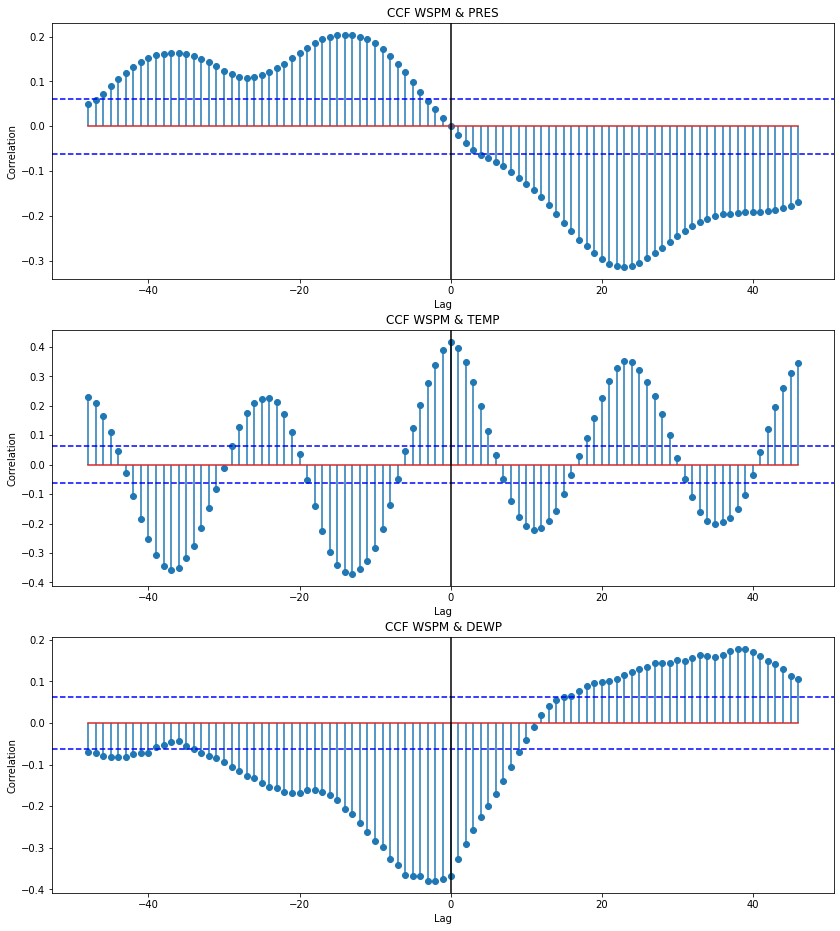

In [19]:
size = 1000
fig, ax = plt.subplots(3,1, figsize=(14, 16))
plot_ccf(df.WSPM.iloc[:size], df.PRES.iloc[:size], 48, 95, ax[0], title="CCF WSPM & PRES")
plot_ccf(df.WSPM.iloc[:size], df.TEMP.iloc[:size], 48, 95, ax[1], title="CCF WSPM & TEMP")
plot_ccf(df.WSPM.iloc[:size], df.DEWP.iloc[:size], 48, 95, ax[2], title="CCF WSPM & DEWP")
fig.savefig('ccfs.png', dpi=300)